In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance



In [3]:
data = pd.read_excel("/content/GP2F.xlsx")

In [4]:
colorPalette= ['#78a798', '#c6c6c6','#d68889','#6F8FAF']

In [5]:
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides       96205
Macrolides          23847
Cephalosporins      17392
Oxazolidinones        679
Penicillins           488
Anticoagulants        481
Immunoglobulins       159
Fluoroquinolones       76
Aminoglycosides        70
Lincosamides           25
Name: count, dtype: int64

In [6]:
data = pd.DataFrame(data)
# List of values to remove from the DataFrame
values_to_remove = ['Lincosamides', 'Aminoglycosides', 'Fluoroquinolones', 'Immunoglobulins']
data = data[~data.isin(values_to_remove).any(axis=1)]
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides     96205
Macrolides        23847
Cephalosporins    17392
Oxazolidinones      679
Penicillins         488
Anticoagulants      481
Name: count, dtype: int64

visualize antibiotics count

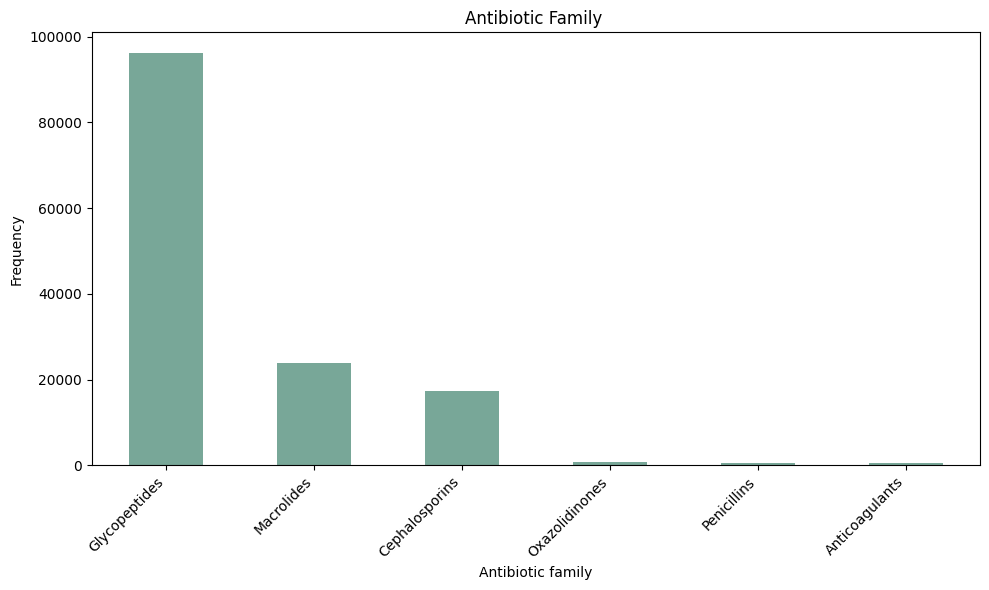

In [7]:
family_counts = data['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
family_counts.plot(kind='bar', color=colorPalette[0])
plt.title('Antibiotic Family ')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
data['Bacteria'].value_counts()

Bacteria
Escherichia coli                                   39555
Klebsiella pneumoniae                              28477
Pseudomonas aeruginosa                             13626
Staphylococcus (coagulase-negative)                12564
Acinetobacter baumannii                            10429
Enterobacter cloacae                               10406
Staphylococcus aureus                              10168
Serratia marcescens                                 2468
Proteus mirabilis                                   2008
Enterococcus spp.                                   1601
Enterococcus faecalis                                942
Citrobacter freundii                                 899
Klebsiella oxytoca                                   692
Proteus spp.                                         617
Streptococcus spp. (Group Viridans α-hemolysis)      590
Streptococcus agalactiae (Group B β-hemolysis)       562
Klebsiella aerogenes                                 553
Morganella morganii   

In [9]:
data.columns

Index(['PatientID', 'InsuranceType', 'Age', 'Gender', 'Bacteria',
       'SpecimenType', 'SensitivityResult', 'AdmissionPeriod', 'Hospital',
       'DiagnosisDateTime', 'Antibiotics', 'AdministrationMethod', 'Dosage',
       'Prescription', 'StartDate', 'End date', 'TreatmentTime',
       'Antibiotic_Family', 'City'],
      dtype='object')

In [10]:
data=data.drop(['DiagnosisDateTime','StartDate','End date','PatientID','Hospital','City','AdmissionPeriod','Prescription','TreatmentTime','Antibiotics','InsuranceType'],axis=1)

# **Escherichia coli**

In [11]:
Eco= data[data['Bacteria'] == 'Escherichia coli']
df = pd.DataFrame(Eco)
df = df.applymap(str)


anything under 250 drop

In [12]:
Eco.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Anticoagulants      213
Penicillins          48
Oxazolidinones       45
Name: count, dtype: int64

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Assuming data is already loaded and available in 'data'

# Filter data for Escherichia coli and convert all entries to strings
Eco = data[data['Bacteria'] == 'Escherichia coli']
df = pd.DataFrame(Eco)
df = df.applymap(str)

# Remove specified values
values_to_remove = ['Anticoagulants', 'Penicillins', 'Oxazolidinones']
df = df[~df.isin(values_to_remove).any(axis=1)]
print(df['Antibiotic_Family'].value_counts())
print(df['SensitivityResult'].value_counts())

# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['SensitivityResult','Bacteria'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Name: count, dtype: int64
SensitivityResult
S    24409
R    14840
Name: count, dtype: int64
Cross-validation scores: [0.89617834 0.90076433 0.88993631 0.89859873 0.89680214]
Mean accuracy: 0.8965
Standard deviation of scores: 0.0036
Accuracy on unseen test data: 0.8951592356687899
Confusion matrix:
 [[2565  403]
 [ 420 4462]]
Precision: 0.9171634121274409
Recall: 0.9139696845555101
F1-score: 0.9155637632091926
Sensitivity: 0.9139696845555101
Specificity: 0.8642183288409704
AuROC: 0.9576095241223881
Matthews Correlation Coefficient (MCC): 0.7773234737313257


feature importantance for Escherichia coli

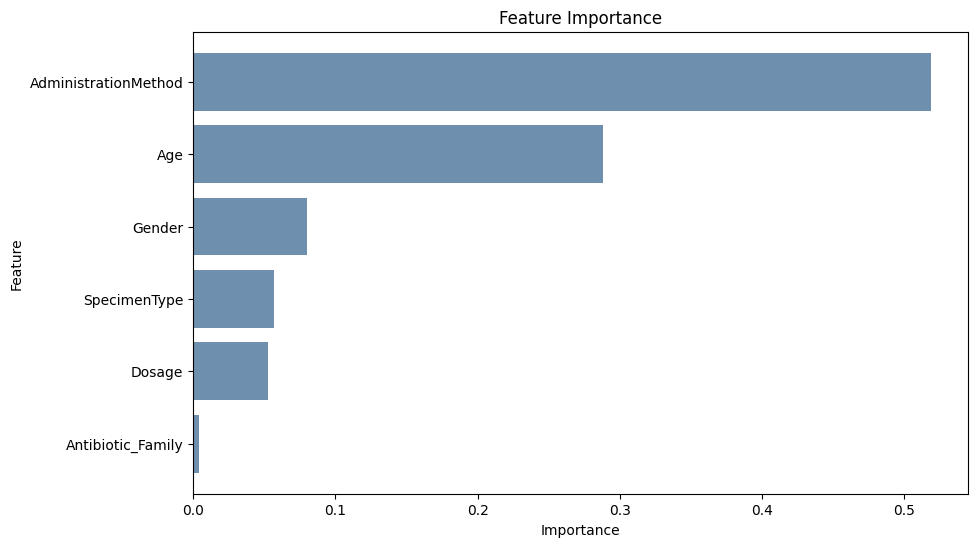

In [14]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


ROC Plot for Logisitc Reg Escherichia coli

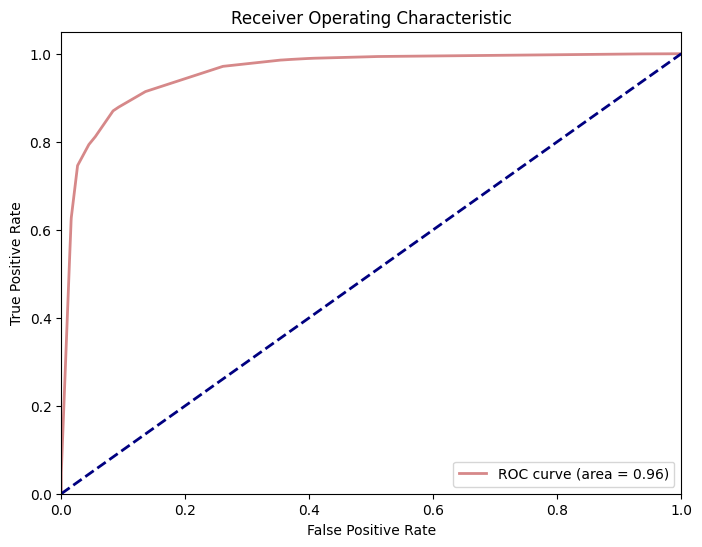

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Learning Curve Escherichia coli**

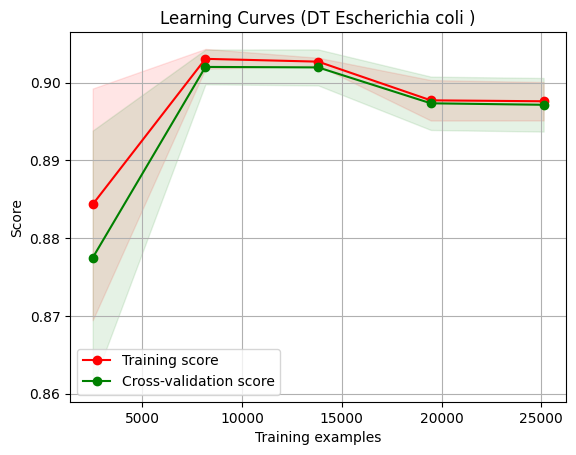

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Escherichia coli )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Klebsiella pneumoniae**

In [17]:
df= data[data['Bacteria'] == 'Klebsiella pneumoniae']
df = pd.DataFrame(df)
df = df.applymap(str)

# Remove specified values
values_to_remove = ['Anticoagulants', 'Penicillins']
df = df[~df.isin(values_to_remove).any(axis=1)]
print(df['Antibiotic_Family'].value_counts())
print(df['SensitivityResult'].value_counts())

# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['SensitivityResult','Bacteria'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Name: count, dtype: int64
SensitivityResult
S    23010
R     5342
Name: count, dtype: int64
Cross-validation scores: [0.89155352 0.90072298 0.89118166 0.8962963  0.89858907]
Mean accuracy: 0.8957
Standard deviation of scores: 0.0038
Accuracy on unseen test data: 0.8982542761417739
Confusion matrix:
 [[ 561  508]
 [  69 4533]]
Precision: 0.8992263439793692
Recall: 0.9850065189048239
F1-score: 0.940163849424453
Sensitivity: 0.9850065189048239
Specificity: 0.5247895229186156
AuROC: 0.8833372158117286
Matthews Correlation Coefficient (MCC): 0.6344976172401143


feature importantance for Klebsiella pneumoniae

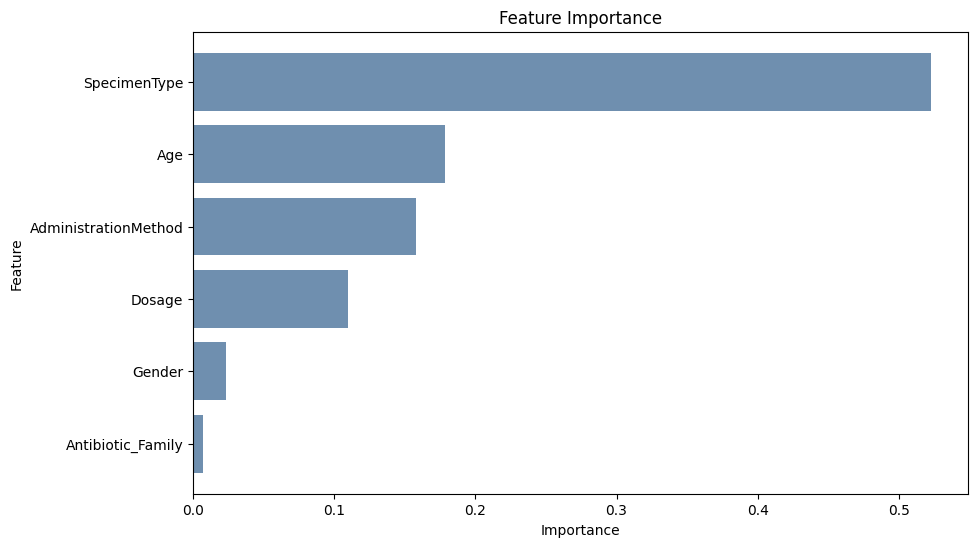

In [18]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


ROC Plot for Logisitc Reg Klebsiella pneumoiae

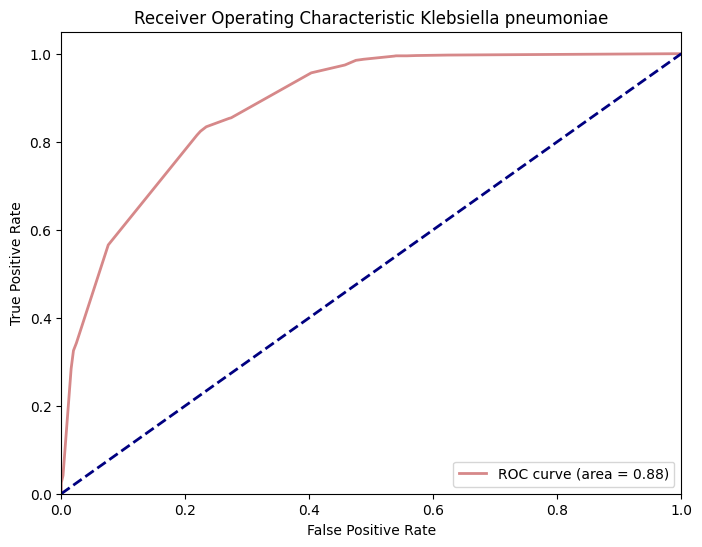

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Klebsiella pneumoniae')
plt.legend(loc="lower right")
plt.show()


**Learning Curve Klebsiella pneumoniae**

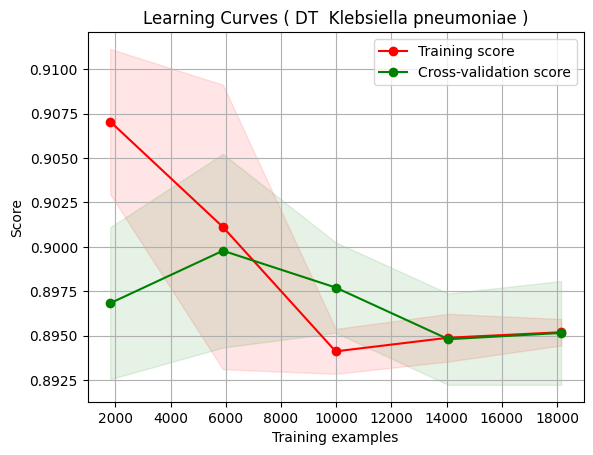

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves ( DT  Klebsiella pneumoniae )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Pseudomonas aeruginosa**

In [21]:
df= data[data['Bacteria'] == 'Pseudomonas aeruginosa']
df = pd.DataFrame(df)
df = df.applymap(str)

# Remove specified values
values_to_remove = ['Anticoagulants', 'Penicillins','Oxazolidinones']
df = df[~df.isin(values_to_remove).any(axis=1)]
print(df['Antibiotic_Family'].value_counts())
print(df['SensitivityResult'].value_counts())

# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['SensitivityResult','Bacteria'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


Antibiotic_Family
Glycopeptides     10516
Cephalosporins     1872
Macrolides         1085
Name: count, dtype: int64
SensitivityResult
S    11082
R     2391
Name: count, dtype: int64
Cross-validation scores: [0.87940631 0.87792208 0.87087199 0.8827023  0.87453601]
Mean accuracy: 0.8771
Standard deviation of scores: 0.0041
Accuracy on unseen test data: 0.8771799628942486
Confusion matrix:
 [[ 257  221]
 [ 110 2107]]
Precision: 0.9050687285223368
Recall: 0.950383400992332
F1-score: 0.9271727172717271
Sensitivity: 0.950383400992332
Specificity: 0.5376569037656904
AuROC: 0.8811070031309981
Matthews Correlation Coefficient (MCC): 0.5435355624768826


Feature importantance for Pseudomonas aeruginosa

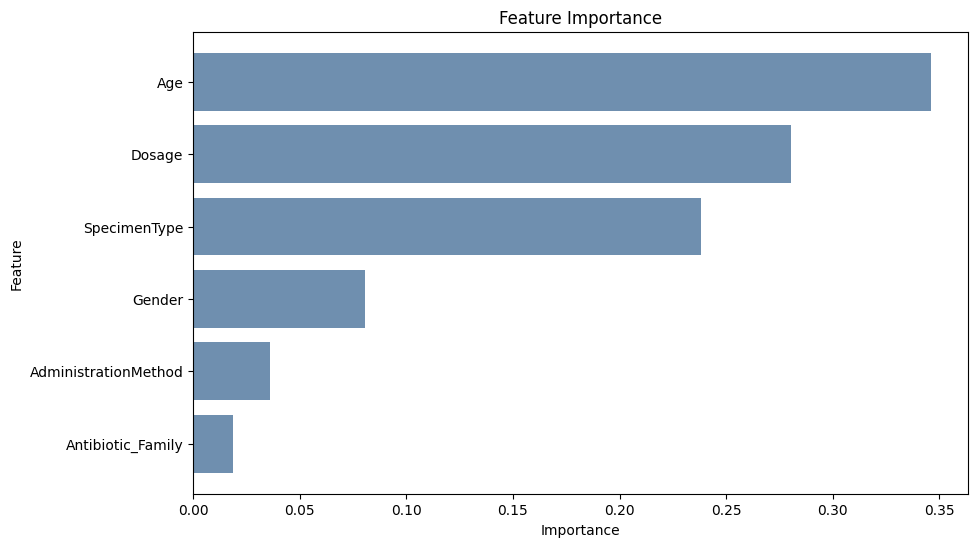

In [22]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


ROC Plot for Logisitc Pseudomonas aeruginosa

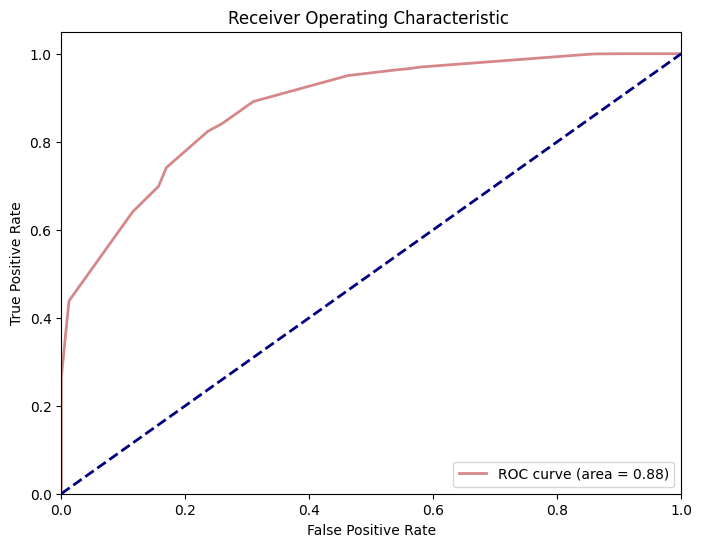

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ')
plt.legend(loc="lower right")
plt.show()


**Learning Curve Pseudomonas aeruginosa**

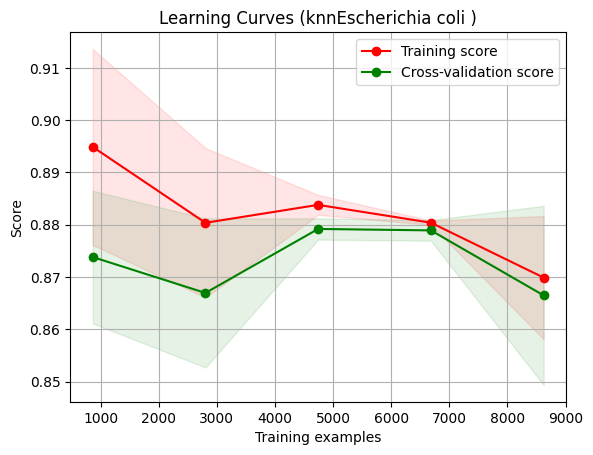

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (knnEscherichia coli )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

# **Staphylococcus (coagulase-negative)**


In [25]:
df= data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
df = pd.DataFrame(df)
df = df.applymap(str)

# Remove specified values
values_to_remove = ['Penicillins']
df = df[~df.isin(values_to_remove).any(axis=1)]
print(df['Antibiotic_Family'].value_counts())
print(df['SensitivityResult'].value_counts())

# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['SensitivityResult','Bacteria'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


Antibiotic_Family
Glycopeptides     7596
Macrolides        4045
Cephalosporins     907
Name: count, dtype: int64
SensitivityResult
R    8706
S    3842
Name: count, dtype: int64
Cross-validation scores: [0.88007968 0.87211155 0.8876494  0.88082902 0.88361897]
Mean accuracy: 0.8809
Standard deviation of scores: 0.0051
Accuracy on unseen test data: 0.8852589641434263
Confusion matrix:
 [[1668   73]
 [ 215  554]]
Precision: 0.8835725677830941
Recall: 0.7204161248374512
F1-score: 0.7936962750716332
Sensitivity: 0.7204161248374512
Specificity: 0.95807007466973
AuROC: 0.9460450139636952
Matthews Correlation Coefficient (MCC): 0.7225112995288306


**feature importance**

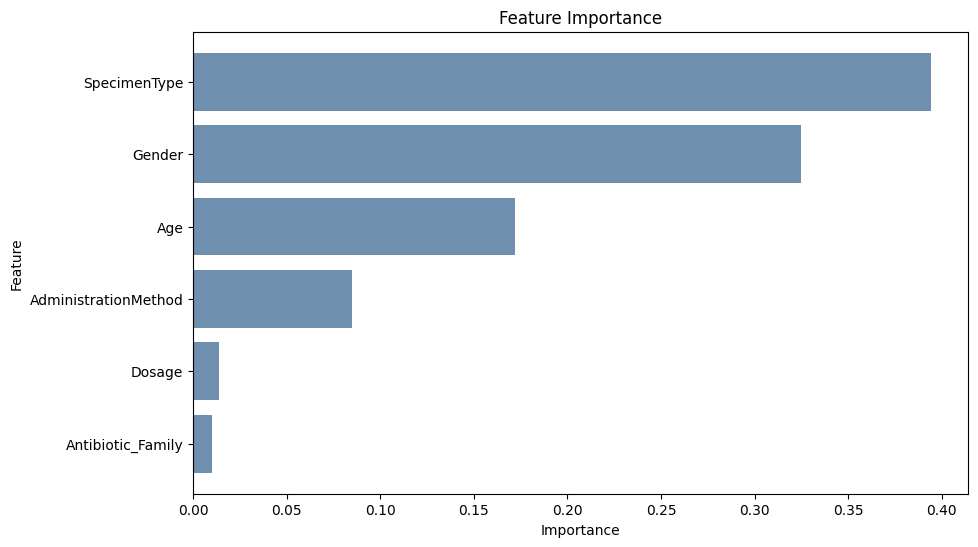

In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


ROC Plot for KNN Staphylococus

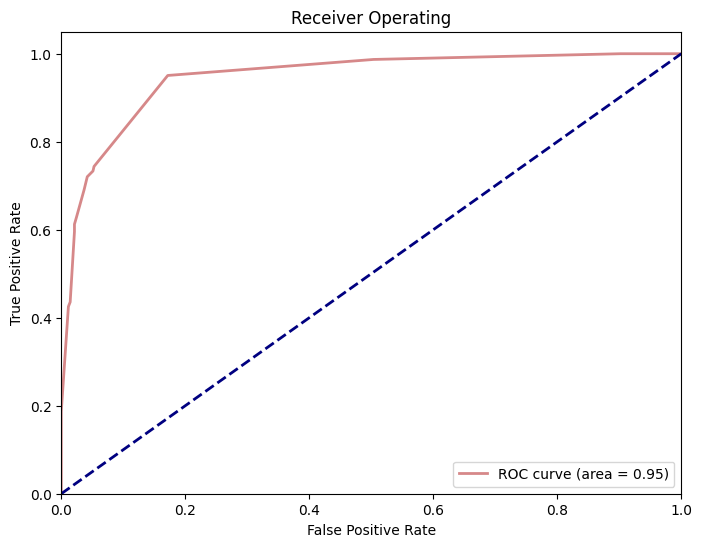

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating')
plt.legend(loc="lower right")
plt.show()


**Learning Curve Staphylococus**

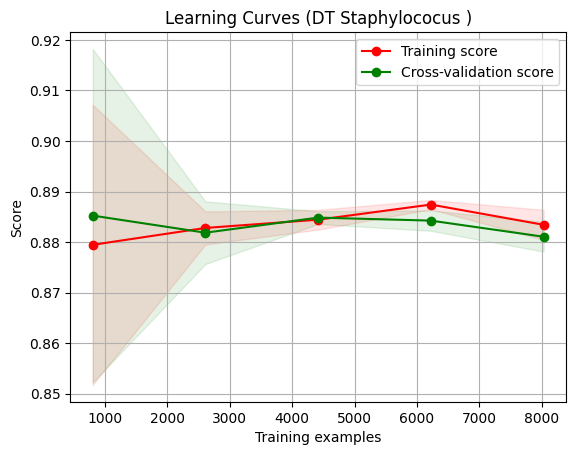

In [28]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Staphylococus )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Acinetobacter baumannii**

In [29]:
df= data[data['Bacteria'] == 'Acinetobacter baumannii']
df = pd.DataFrame(df)
df = df.applymap(str)

# Remove specified values
values_to_remove = ['Anticoagulants', 'Penicillins', 'Oxazolidinones','Marcolides']
df = df[~df.isin(values_to_remove).any(axis=1)]
print(df['Antibiotic_Family'].value_counts())
print(df['SensitivityResult'].value_counts())

# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['SensitivityResult','Bacteria'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


Antibiotic_Family
Glycopeptides     9739
Cephalosporins     424
Macrolides          66
Name: count, dtype: int64
SensitivityResult
R    9322
S     907
Name: count, dtype: int64
Cross-validation scores: [0.97800587 0.97556207 0.98044966 0.98484848 0.98288509]
Mean accuracy: 0.9804
Standard deviation of scores: 0.0033
Accuracy on unseen test data: 0.9780058651026393
Confusion matrix:
 [[1848   17]
 [  28  153]]
Precision: 0.9
Recall: 0.8453038674033149
F1-score: 0.8717948717948719
Sensitivity: 0.8453038674033149
Specificity: 0.9908847184986596
AuROC: 0.9796098529172159
Matthews Correlation Coefficient (MCC): 0.8602844300907251


feature importantance

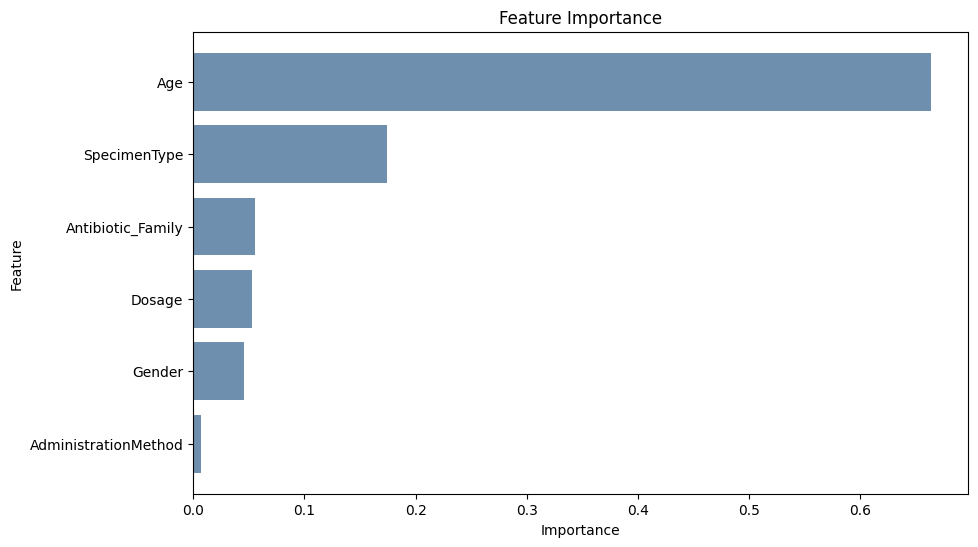

In [30]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


ROC Plot for Logisitc Acinetobacter baumannii

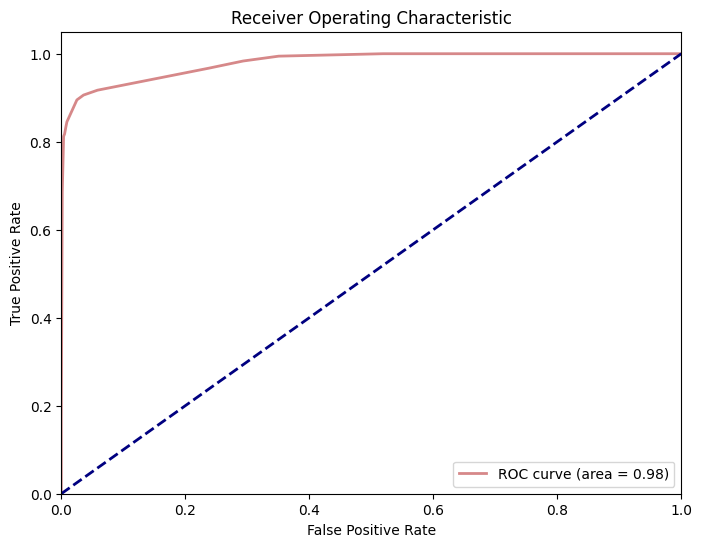

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

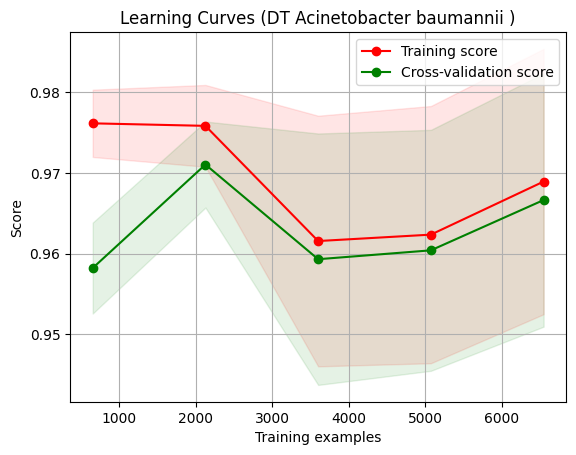

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Acinetobacter baumannii )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Escherichia coli and Antibiotics**

##***Escherichia coli* and *Glycopeptides***

In [33]:
eco = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(eco)
df = df.applymap(str)

In [34]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.92791128 0.90503697 0.9198244  0.91497227 0.93784658]
Mean accuracy: 0.9211
Standard deviation of scores: 0.0112
Accuracy on unseen test data: 0.9061922365988909
Confusion matrix:
 [[ 471  285]
 [ 121 3451]]
Precision: 0.9237152034261242
Recall: 0.9661254199328108
F1-score: 0.9444444444444444
Sensitivity: 0.9661254199328108
Specificity: 0.623015873015873
AuROC: 0.9009402939974048
Matthews Correlation Coefficient (MCC): 0.6509862255112673


**Feature importance**

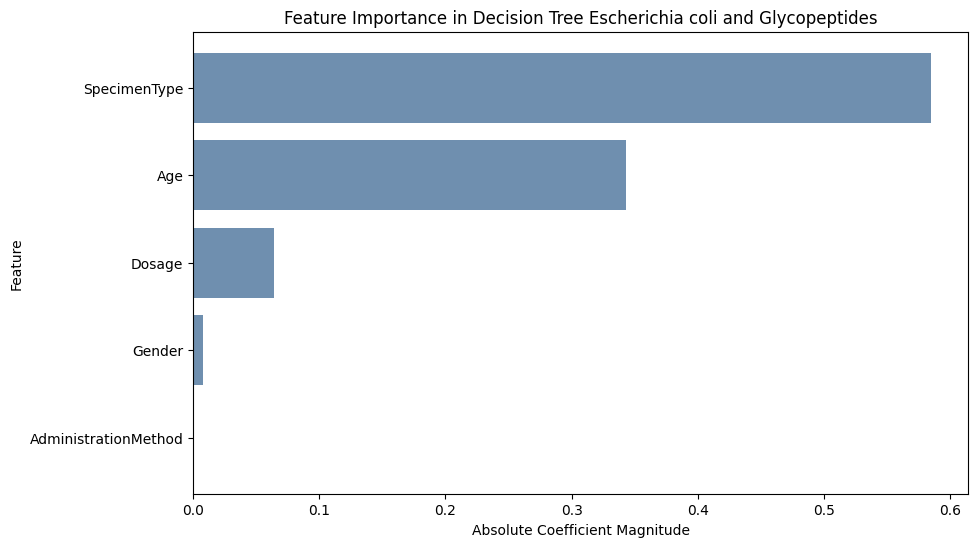

In [35]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Escherichia coli and Glycopeptides')
plt.gca().invert_yaxis()
plt.show()

 **ROC Plot**

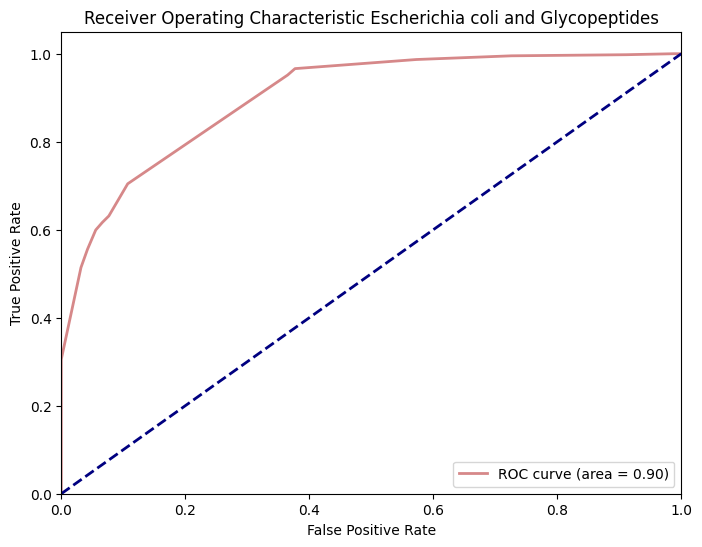

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Escherichia coli and Glycopeptides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

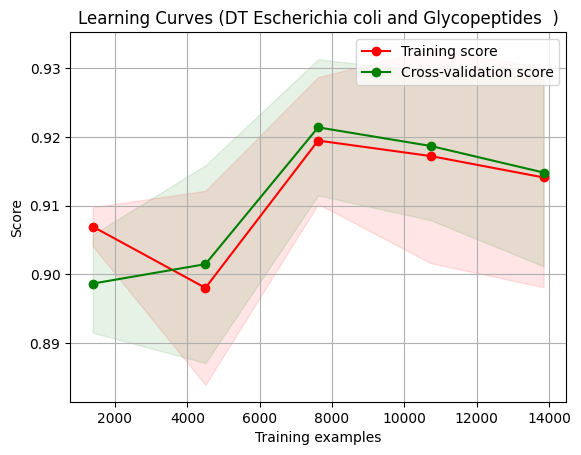

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Escherichia coli and Glycopeptides  )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Escherichia coli and Macrolides***

In [38]:
mac = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(mac)
df = df.applymap(str)

In [39]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.89022758 0.903125   0.896875   0.89642857 0.89375   ]
Mean accuracy: 0.8961
Standard deviation of scores: 0.0042
Accuracy on unseen test data: 0.891566265060241
Confusion matrix:
 [[1813   24]
 [ 219  185]]
Precision: 0.8851674641148325
Recall: 0.45792079207920794
F1-score: 0.6035889070146819
Sensitivity: 0.45792079207920794
Specificity: 0.9869352204681546
AuROC: 0.9051456043807973
Matthews Correlation Coefficient (MCC): 0.5880709558040164


**Feature importance**

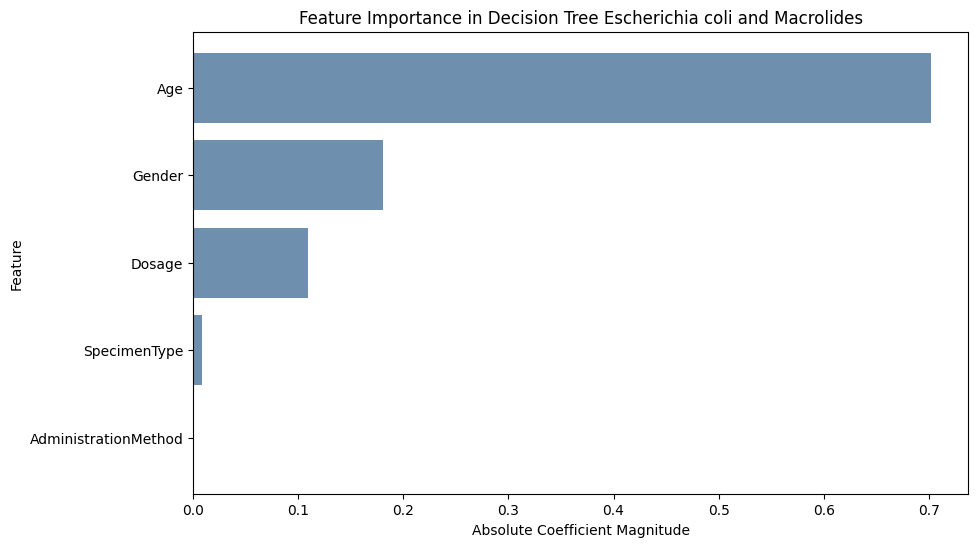

In [40]:
feature_importances = model.feature_importances_
feature_names = X.columns

#Df to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Escherichia coli and Macrolides')
plt.gca().invert_yaxis()
plt.show()

**ROC plot**

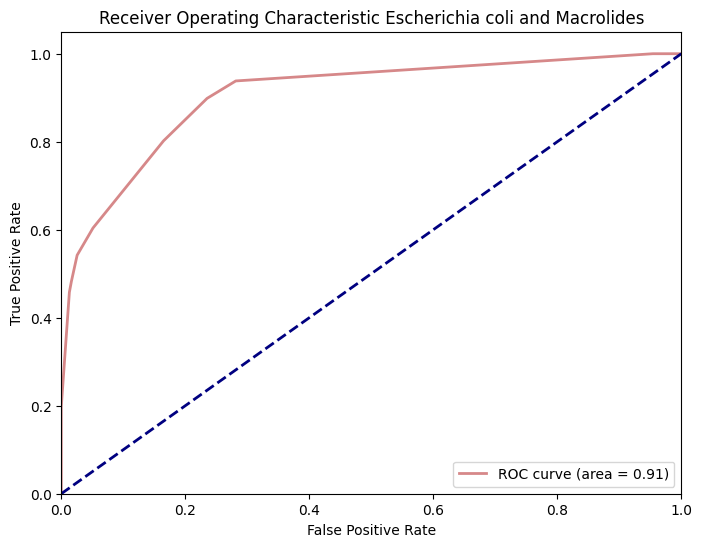

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Escherichia coli and Macrolides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

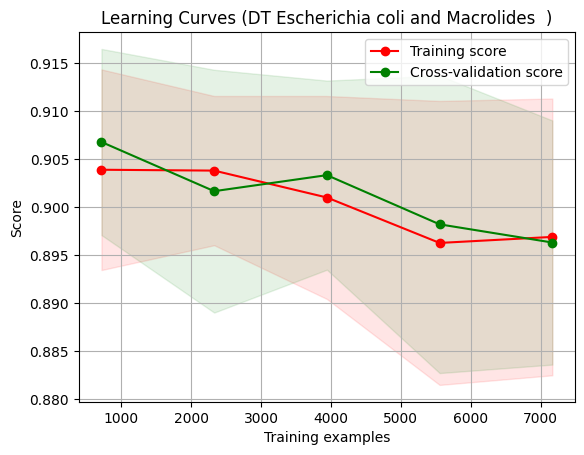

In [42]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Escherichia coli and Macrolides  )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Escherichia coli and Cephalosporins***

In [43]:
c = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(c)
df = df.applymap(str)

In [44]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.89313573 0.89547582 0.91341654 0.88446526 0.91334895]
Mean accuracy: 0.9000
Standard deviation of scores: 0.0116
Accuracy on unseen test data: 0.9141965678627145
Confusion matrix:
 [[292  84]
 [ 26 880]]
Precision: 0.9128630705394191
Recall: 0.9713024282560706
F1-score: 0.9411764705882352
Sensitivity: 0.9713024282560706
Specificity: 0.776595744680851
AuROC: 0.9584375440326899
Matthews Correlation Coefficient (MCC): 0.788403269511715


**Feature Importance**

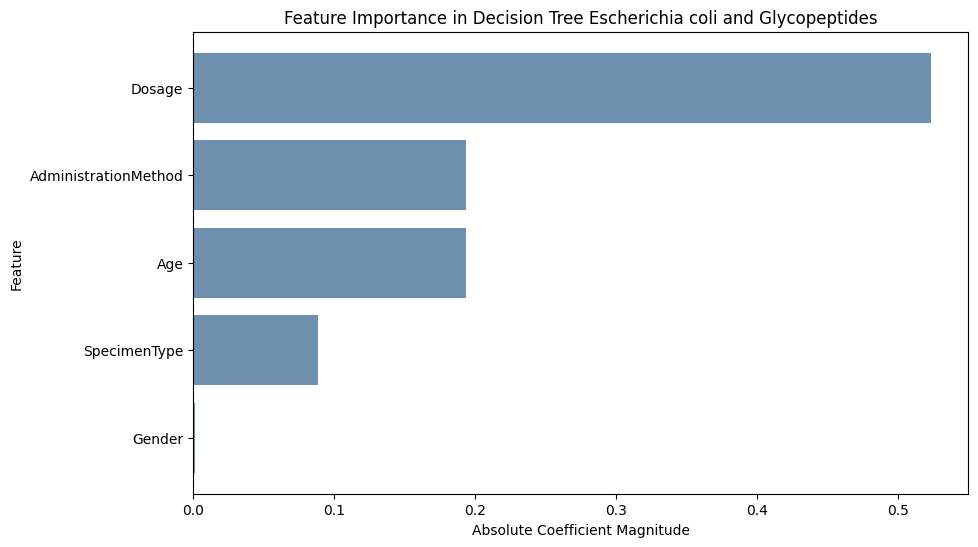

In [45]:
feature_importances = model.feature_importances_
feature_names = X.columns

#Store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Escherichia coli and Glycopeptides')
plt.gca().invert_yaxis()
plt.show()

**ROC Plot**

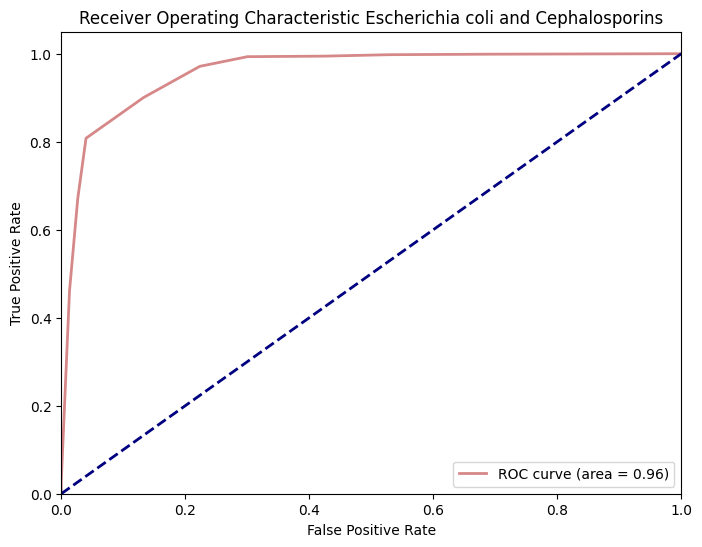

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Escherichia coli and Cephalosporins')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

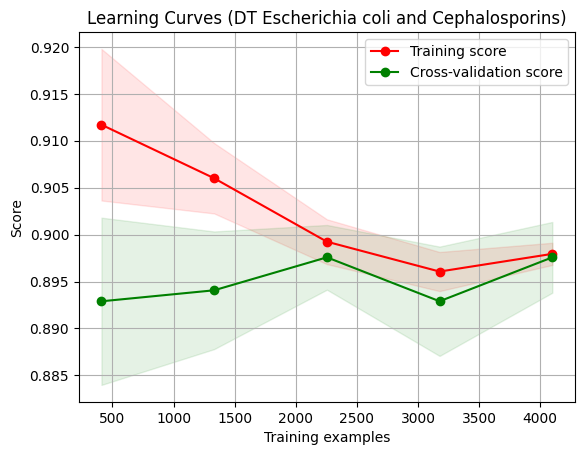

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Escherichia coli and Cephalosporins)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Klebsiella pneumoniae and Antibiotics**

In [48]:
kly=data[data['Bacteria']=='Klebsiella pneumoniae']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Anticoagulants       73
Penicillins          52
Name: count, dtype: int64

## ***Klebsiella pneumoniae and Glycopeptides***

In [49]:
kd=data[(data['Bacteria']=='Klebsiella pneumoniae') & (data['Antibiotic_Family'] =='Glycopeptides')]
df = pd.DataFrame(kd)
df= df.applymap(str)

In [51]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.90599455 0.88910082 0.88825293 0.89261379 0.89206868]
Mean accuracy: 0.8936
Standard deviation of scores: 0.0064
Accuracy on unseen test data: 0.8866485013623978
Confusion matrix:
 [[ 504  315]
 [ 101 2750]]
Precision: 0.8972267536704731
Recall: 0.9645738337425465
F1-score: 0.929682217714672
Sensitivity: 0.9645738337425465
Specificity: 0.6153846153846154
AuROC: 0.9299622393273744
Matthews Correlation Coefficient (MCC): 0.6507954570255761


**Feature Importance**

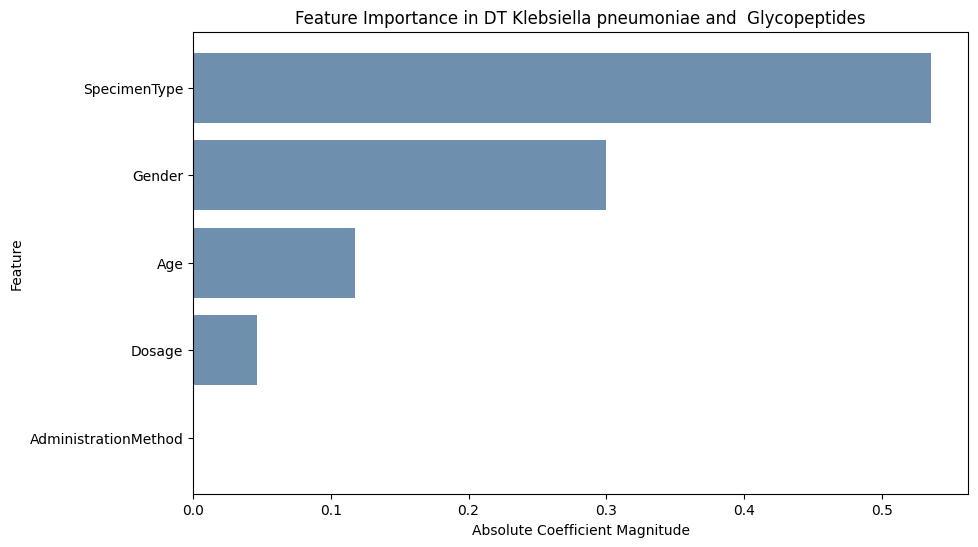

In [53]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')

plt.title('Feature Importance in DT Klebsiella pneumoniae and  Glycopeptides')
plt.gca().invert_yaxis()
plt.show()

**ROC Plot**

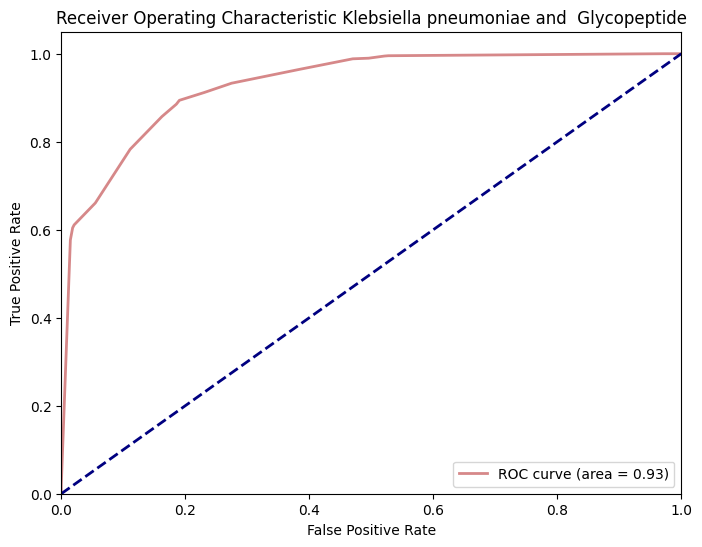

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Klebsiella pneumoniae and  Glycopeptide')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

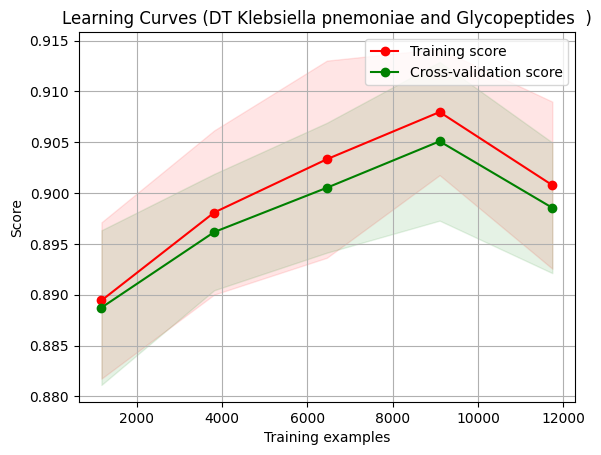

In [55]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Klebsiella pnemoniae and Glycopeptides  )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Klebsiella pneumoniae and Cephalosporins***

In [56]:
kc=data[(data['Bacteria']=='Klebsiella pneumoniae') & (data['Antibiotic_Family'] =='Cephalosporins')]
df = pd.DataFrame(kc)
df= df.applymap(str)

In [57]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.86675639 0.88140162 0.87331536 0.85714286 0.86253369]
Mean accuracy: 0.8682
Standard deviation of scores: 0.0084
Accuracy on unseen test data: 0.8506056527590848
Confusion matrix:
 [[ 83  84]
 [ 27 549]]
Precision: 0.8672985781990521
Recall: 0.953125
F1-score: 0.9081885856079404
Sensitivity: 0.953125
Specificity: 0.49700598802395207
AuROC: 0.9156114853626082
Matthews Correlation Coefficient (MCC): 0.5290664125193392


**Feature Importance**

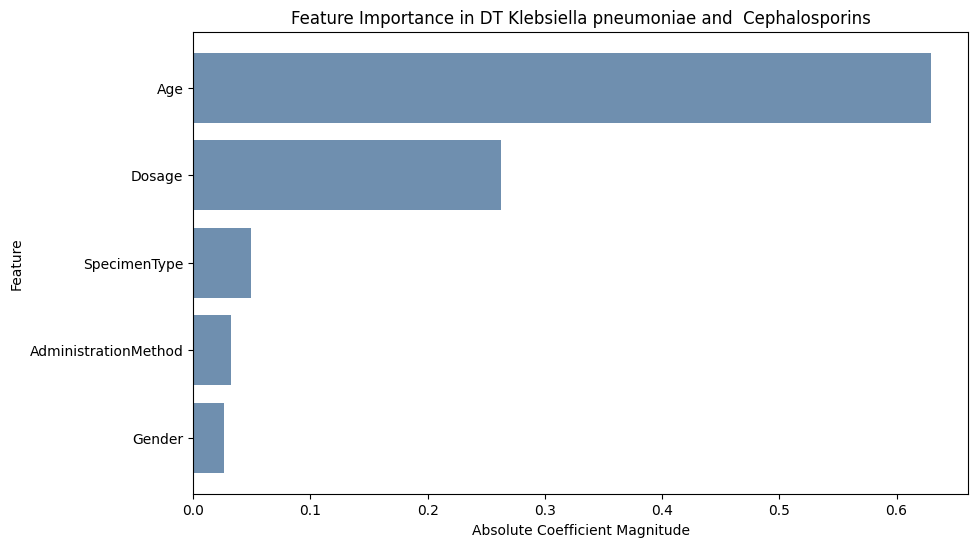

In [58]:
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')

plt.title('Feature Importance in DT Klebsiella pneumoniae and  Cephalosporins')
plt.gca().invert_yaxis()
plt.show()

**ROC Plot**

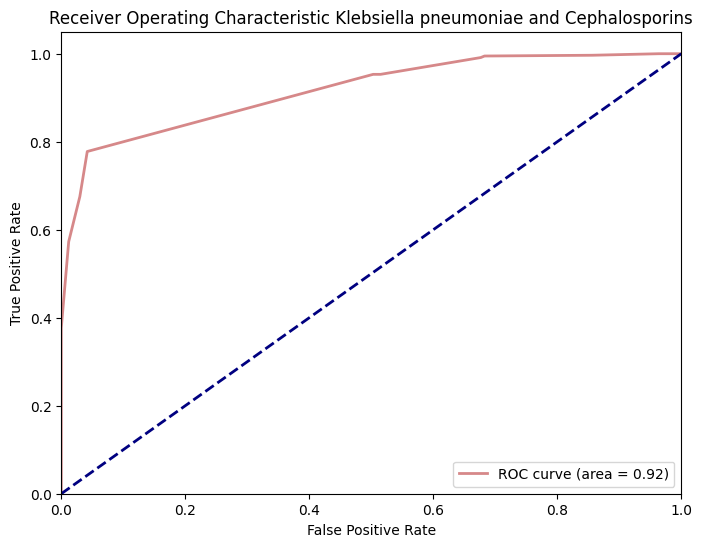

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Klebsiella pneumoniae and Cephalosporins')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

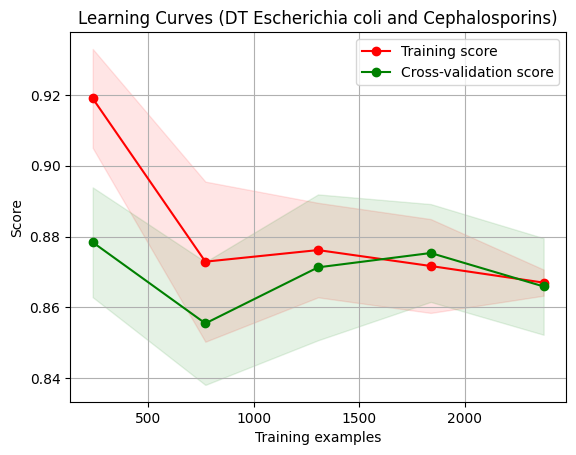

In [60]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Klebsiella pneumoniae and Cephalosporins)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Klebsiella pneumoniae and Macrolides***

In [95]:
km=data[(data['Bacteria']=='Klebsiella pneumoniae') & (data['Antibiotic_Family'] =='Macrolides')]
df = pd.DataFrame(km)
df= df.applymap(str)

In [96]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.97932175 0.98014888 0.97764901 0.97847682 0.97930464]
Mean accuracy: 0.9790
Standard deviation of scores: 0.0009
Accuracy on unseen test data: 0.9776674937965261
Confusion matrix:
 [[  55   27]
 [   0 1127]]
Precision: 0.9766031195840554
Recall: 1.0
F1-score: 0.9881630863656291
Sensitivity: 1.0
Specificity: 0.6707317073170732
AuROC: 0.8805159391434199
Matthews Correlation Coefficient (MCC): 0.8093445976651683


**Feature Importance**

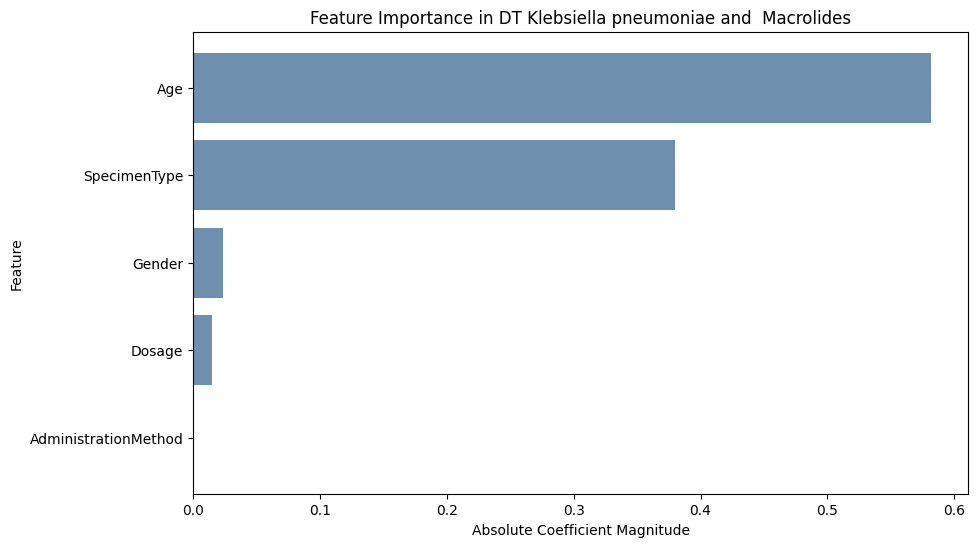

In [97]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')

plt.title('Feature Importance in DT Klebsiella pneumoniae and  Macrolides')
plt.gca().invert_yaxis()
plt.show()

**ROC Plot**

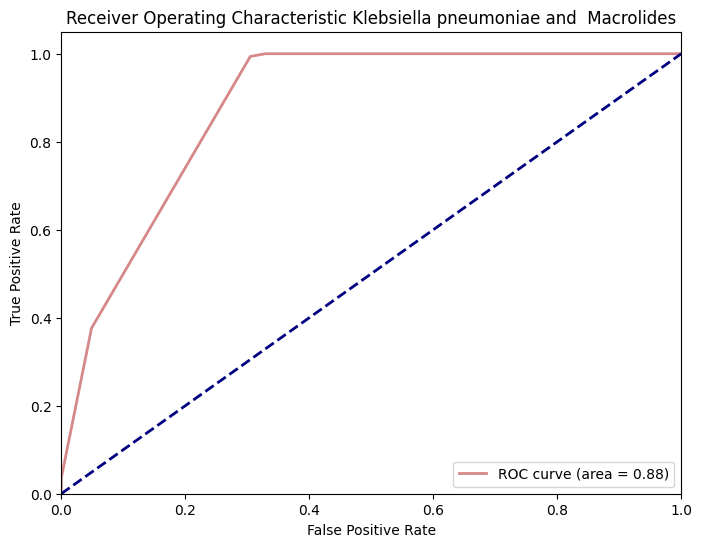

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Klebsiella pneumoniae and  Macrolides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

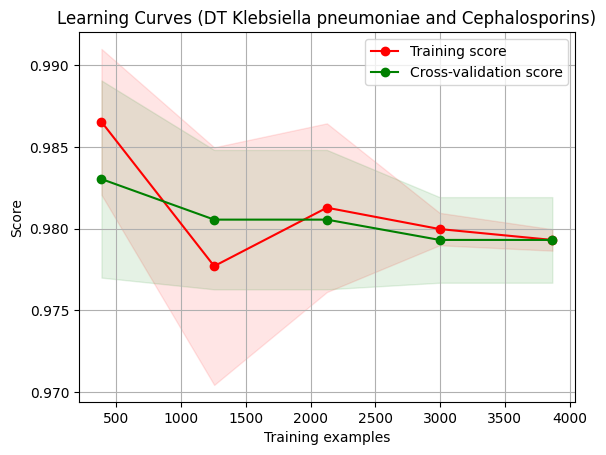

In [99]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Klebsiella pneumoniae and Macrolides)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Pseudomonas aeruginosa and Antibiotics**

In [100]:
p=data[(data['Bacteria']=='Pseudomonas aeruginosa') ]
p.Antibiotic_Family.value_counts()


Antibiotic_Family
Glycopeptides     10516
Cephalosporins     1872
Macrolides         1085
Oxazolidinones      114
Anticoagulants       27
Penicillins          12
Name: count, dtype: int64

## ***Pseudomonas aeruginosa* and *Glycopeptides***

In [101]:
pg=data[(data['Bacteria']=='Pseudomonas aeruginosa') & (data['Antibiotic_Family'] =='Glycopeptides')]
df = pd.DataFrame(pg)
df= df.applymap(str)

In [102]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.86787072 0.87826914 0.88445078 0.88302425 0.88112221]
Mean accuracy: 0.8789
Standard deviation of scores: 0.0059
Accuracy on unseen test data: 0.8802281368821293
Confusion matrix:
 [[ 156  211]
 [  41 1696]]
Precision: 0.8893550078657577
Recall: 0.9763960852043754
F1-score: 0.9308452250274424
Sensitivity: 0.9763960852043754
Specificity: 0.4250681198910082
AuROC: 0.9136348020875982
Matthews Correlation Coefficient (MCC): 0.5229634186784025


**Feature Importance**

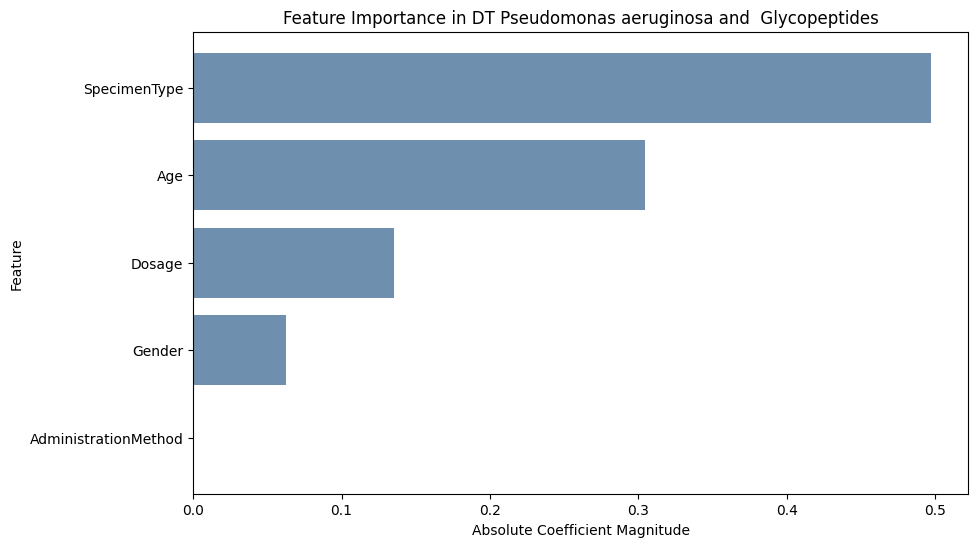

In [103]:
feature_importances = model.feature_importances_
# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in DT Pseudomonas aeruginosa and  Glycopeptides')
plt.gca().invert_yaxis()
plt.show()


**ROC Plot**

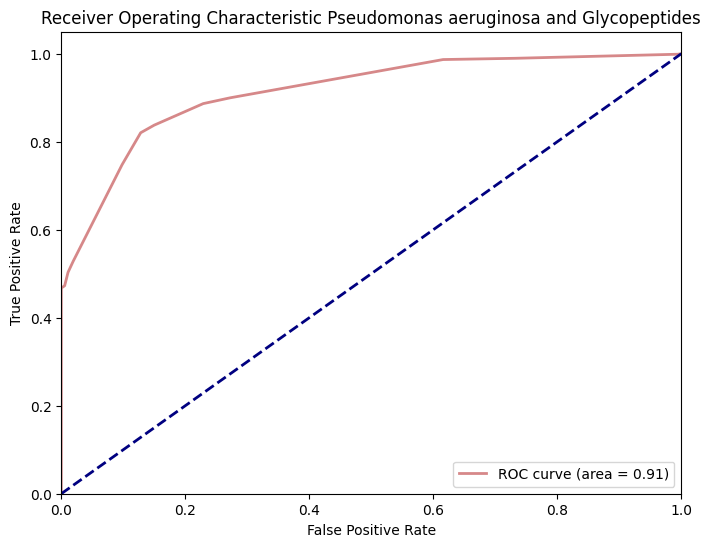

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Pseudomonas aeruginosa and Glycopeptides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

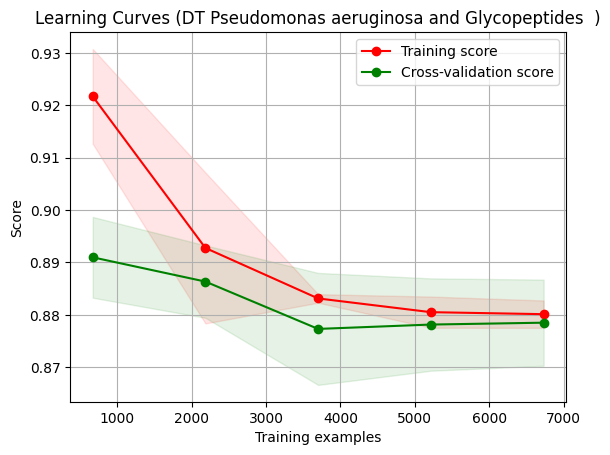

In [105]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Pseudomonas aeruginosa and Glycopeptides  )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Pseudomonas aeruginosa* and *Cephalosporins***

In [106]:
pc=data[(data['Bacteria']=='Pseudomonas aeruginosa') & (data['Antibiotic_Family'] =='Cephalosporins')]
df = pd.DataFrame(pc)
df= df.applymap(str)

In [107]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.944      0.944      0.93850267 0.95187166 0.94385027]
Mean accuracy: 0.9444
Standard deviation of scores: 0.0043
Accuracy on unseen test data: 0.928
Confusion matrix:
 [[ 73  11]
 [ 16 275]]
Precision: 0.9615384615384616
Recall: 0.9450171821305842
F1-score: 0.953206239168111
Sensitivity: 0.9450171821305842
Specificity: 0.8690476190476191
AuROC: 0.9774382261495663
Matthews Correlation Coefficient (MCC): 0.7977505175277567


**Feature Importance**

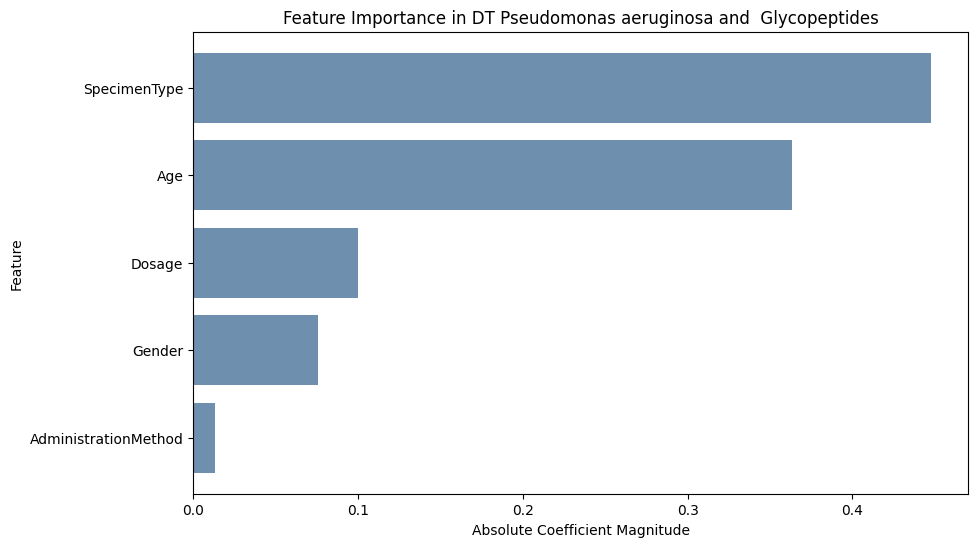

In [108]:
feature_importances = model.feature_importances_
# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in DT Pseudomonas aeruginosa and  Cephalosporins')
plt.gca().invert_yaxis()
plt.show()


**ROC Plot**

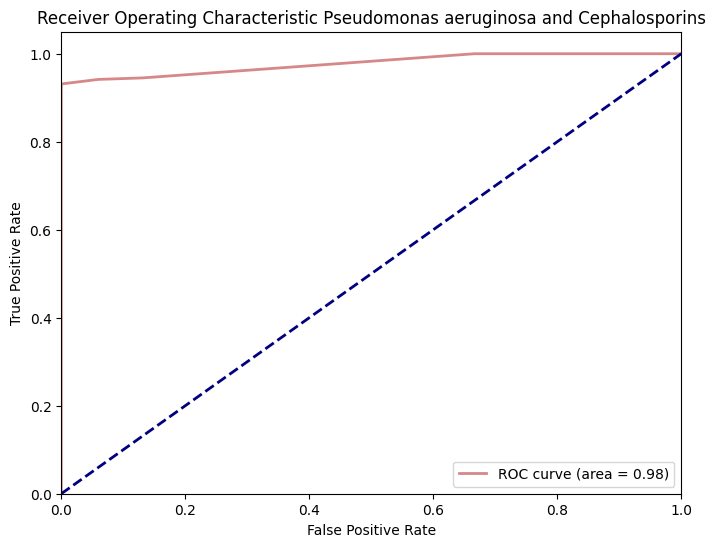

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Pseudomonas aeruginosa and Cephalosporins')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

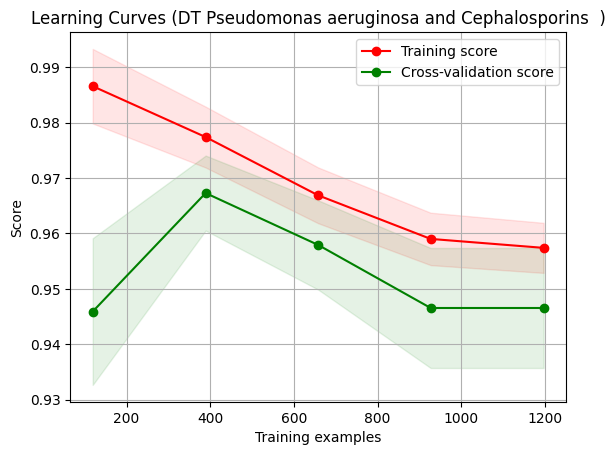

In [110]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Pseudomonas aeruginosa and Cephalosporins)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Staphylococcus (coagulase-negative) and Antibiotics**

In [111]:
st=data[(data['Bacteria']=='Staphylococcus (coagulase-negative)') ]
st.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     7596
Macrolides        4045
Cephalosporins     907
Penicillins         16
Name: count, dtype: int64

## ***Staphylococcus (coagulase-negative)* and *Glycopeptides***

In [113]:
sg=data[(data['Bacteria']=='Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] =='Glycopeptides')]
df = pd.DataFrame(sg)
df= df.applymap(str)

In [114]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.90526316 0.89861751 0.90520079 0.90915076 0.919684  ]
Mean accuracy: 0.9076
Standard deviation of scores: 0.0069
Accuracy on unseen test data: 0.9085526315789474
Confusion matrix:
 [[880  71]
 [ 68 501]]
Precision: 0.8758741258741258
Recall: 0.8804920913884007
F1-score: 0.8781770376862401
Sensitivity: 0.8804920913884007
Specificity: 0.92534174553102
AuROC: 0.9652386998054032
Matthews Correlation Coefficient (MCC): 0.804988559167637


**Feature Importance**

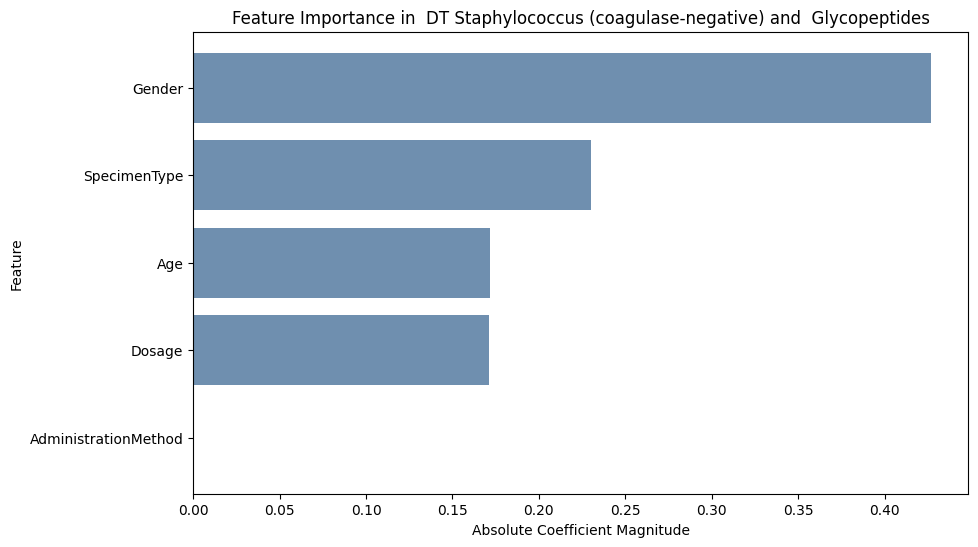

In [115]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in  DT Staphylococcus (coagulase-negative) and  Glycopeptides')
plt.gca().invert_yaxis()
plt.show()


**ROC Plot**

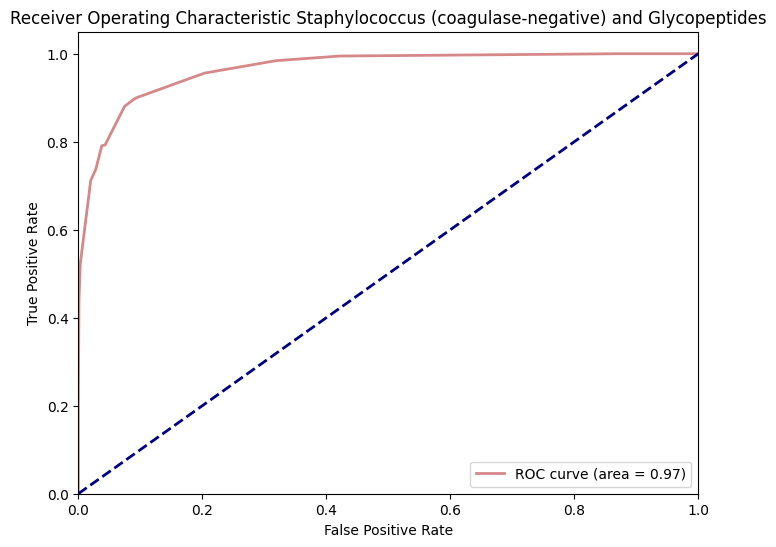

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Staphylococcus (coagulase-negative) and Glycopeptides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

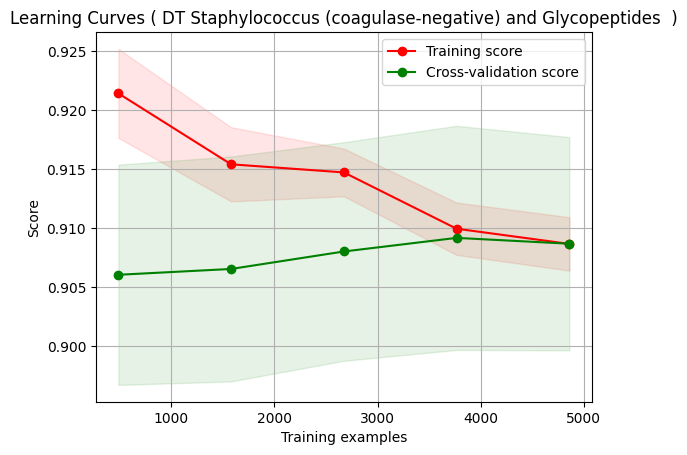

In [117]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves ( DT Staphylococcus (coagulase-negative) and Glycopeptides)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

## ***Staphylococcus (coagulase-negative)* and *Macrolides***

In [118]:
sm=data[(data['Bacteria']=='Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] =='Macrolides')]
df = pd.DataFrame(sm)
df= df.applymap(str)

In [119]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.97651422 0.97404203 0.98763906 0.9802225  0.98393078]
Mean accuracy: 0.9805
Standard deviation of scores: 0.0049
Accuracy on unseen test data: 0.9864029666254636
Confusion matrix:
 [[676   1]
 [ 10 122]]
Precision: 0.991869918699187
Recall: 0.9242424242424242
F1-score: 0.9568627450980391
Sensitivity: 0.9242424242424242
Specificity: 0.9985228951255539
AuROC: 0.9824705698043955
Matthews Correlation Coefficient (MCC): 0.949637706077842


**Feature Importance**

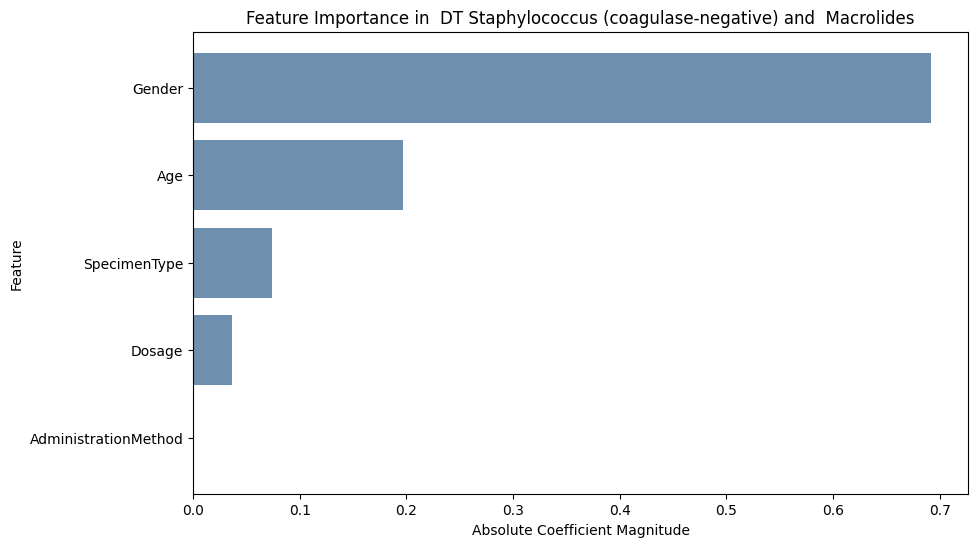

In [120]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in  DT Staphylococcus (coagulase-negative) and  Macrolides')
plt.gca().invert_yaxis()
plt.show()


**ROC Plot**

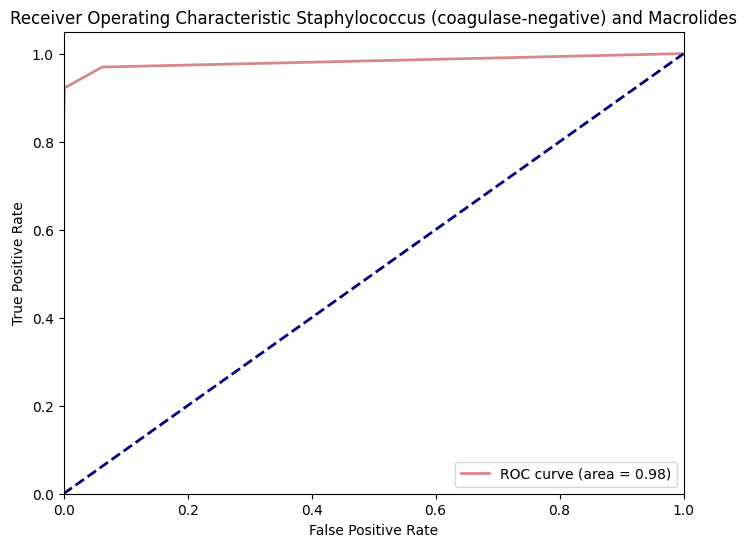

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Staphylococcus (coagulase-negative) and Macrolides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

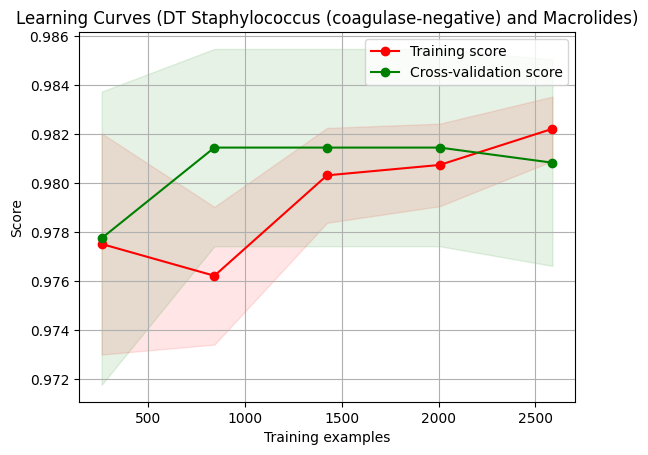

In [122]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Staphylococcus (coagulase-negative) and Macrolides)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

#**Acinetobacter baumannii and Antibiotics**

In [130]:
a=data[(data['Bacteria']=='Acinetobacter baumannii') ]
a.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     9739
Cephalosporins     424
Oxazolidinones     144
Macrolides          66
Anticoagulants      39
Penicillins         17
Name: count, dtype: int64

## ***Acinetobacter baumannii* and *Glycopeptidess***

In [132]:
ag=data[(data['Bacteria']=='Acinetobacter baumannii') & (data['Antibiotic_Family'] =='Glycopeptides')]
df = pd.DataFrame(ag)
df= df.applymap(str)

In [133]:
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']

model = DecisionTreeClassifier(random_state=42,max_depth=5,max_features='log2')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform cross-validation on the scaled and resampled training data
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
model.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = model.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = model.predict(X_test)


# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = model.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

Cross-validation scores: [0.96765914 0.97433265 0.98511294 0.97535934 0.97688752]
Mean accuracy: 0.9759
Standard deviation of scores: 0.0056
Accuracy on unseen test data: 0.9820328542094456
Confusion matrix:
 [[1794    7]
 [  28  119]]
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1-score: 0.8717948717948718
Sensitivity: 0.8095238095238095
Specificity: 0.9961132704053304
AuROC: 0.9685378871148682
Matthews Correlation Coefficient (MCC): 0.8651581664935026


**Feature Importance**

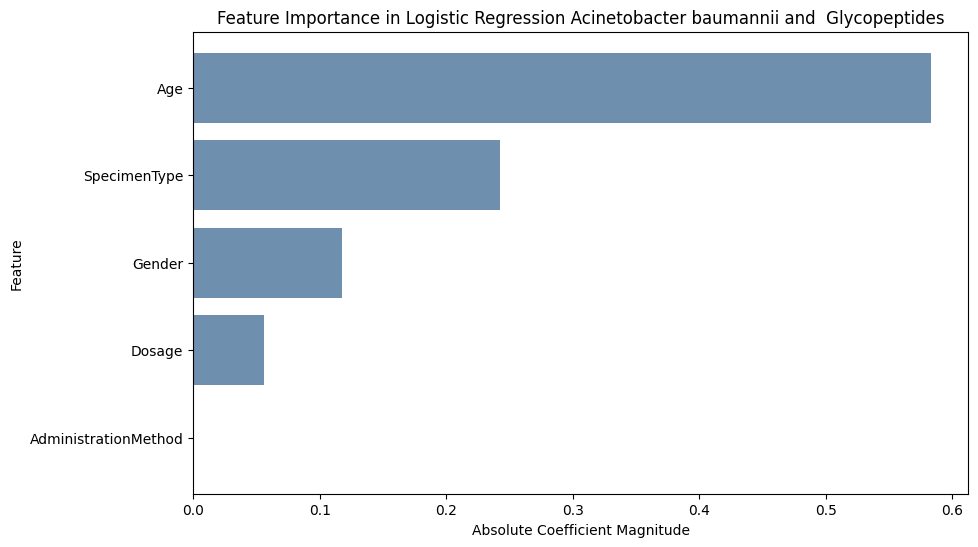

In [134]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Acinetobacter baumannii and  Glycopeptides')
plt.gca().invert_yaxis()
plt.show()

**ROC plot**

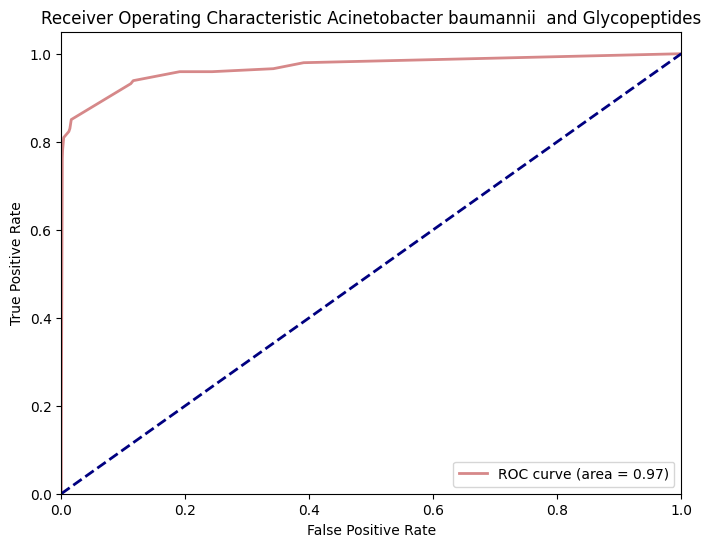

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colorPalette[2], lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Acinetobacter baumannii  and Glycopeptides')
plt.legend(loc="lower right")
plt.show()


**Learning Curve**

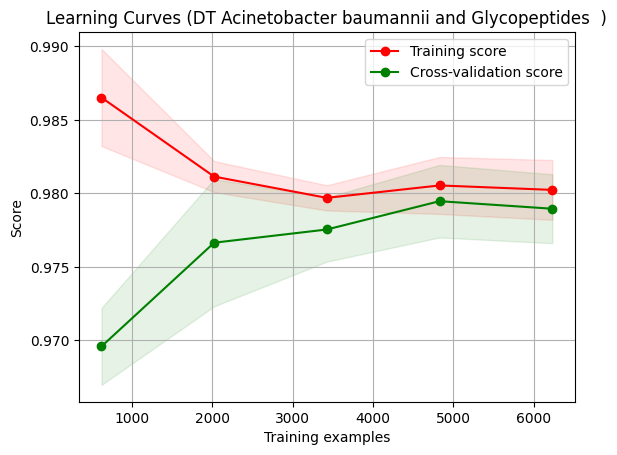

In [136]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (DT Acinetobacter baumannii and Glycopeptides  )"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()